#### Eric Bochsler $$$$  Astronomy 425 $$$$ Problem Set 4 $$$$ Problems 3 $$$$

In [84]:
%pylab inline
import matplotlib.image as mpimg
from scipy.spatial import KDTree, cKDTree

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Problem 3.

In [85]:
#Attempted to put in class, I will continue continue working on this.
class GravitationalPointSourceLens():
    """When a massive body between a source of light and an observer distorts the shape of the source 
    through gravitational lensing. This case is for a lens that can be treated as a point source of mass.
    Gravitational point source lenses have the following properties:

    Attributes:
        Mass: Float that represents mass of lens in kg.
        dl: Float that represents distance to lens in Mpc
        ds: Float that represents distance to source in Mpc
    """
    def _init_(self, M, dl, ds):
        self.M = M
        self.dl = dl
        self.ds = ds
        self.dls = dl - ds
    

In [86]:
def beta(Dl, Ds, M, theta):
    '''Applies gravitational lens of mass M to a source of light.
    
    Inputs:
        Dl: Distance to lens from observer in Mpc
        Ds: Distance to source from observer in Mpc
        M: Mass of lens in kg
        theta: Angle 
    '''
    Mpc = 3.086e22 #m Mpc^-1
    c = 3.0e8 #m s^-1
    G = 6.674e-11 #N m^2 kg^-2
    Dls = Ds - Dl
    eTheta = einsteinTheta(Dl, Ds, M)
    x = eTheta**2
    beta = theta - (x / theta)
    return beta

def einsteinTheta(Dl, Ds, M):
    '''Finds the Einstein Radius for an Einstein ring.
    
    Inputs:
        Dl: Distance to lens from observer
        Ds: Distance to source from observer
        M: Mass of lens in kg
    '''
    Mpc = 3.086e22 #m Mpc^-1
    c = 3.0e8 #m s^-1
    G = 6.674e-11 #N m^2 kg^-2
    Dls = Ds - Dl
    eTheta = ((Dls/(Ds*Dl))*(4.0*G*M/(c**2)))**(1.0/2.0)
    return eTheta

In [87]:
def sourceImage(x, y, x0, y0, sigx, sigy, A):
    '''Creates a test image to be applied to the gravitational lens. The test image takes the shape of a 2D Gaussian.
    It can be easily moved to see how the shape of a lensed image changes based on the position of the source with
    respect to the lens. Gaussian was chosen as an easily recognizable and modifiable test image for gravitational 
    lens.
    
    Inputs:
        x: array of x values for Gaussian to be evaluated
        y: array of y values for Gaussian to be evaluated
        x0: x position of center on coordinate grid by pixel number
        y0: y position of center on coordinate grid by pixel number
        sigx: Size of Gaussian distribution in x-direction
        sigy: Size of Gaussian distribution in y-direction
        A: Amplitude of Gaussian distribution
    '''
    f = A*((2.0*pi*sigx*sigy)**(-1.0))*exp(-((x-x0)**2/(2*sigx**2)+(y-y0)**2/(2*sigy**2)))
    return f


In [88]:
'''Here the image grid is set-up, must contain Einstein Radius, so factor of 3.0 is used. 
The source images are also called here. 
Offset constant changes position of source offset.
Size constant changes size of source image by changing standard deviation of Gaussian source function.
Mass constant will change the mass of the gravitational lens.'''

offset = 3.0
size = 1.5
Mass = 6.0e39 #kg

eTheta = einsteinTheta(50.0, 100.0, Mass)
xcoord, ycoord = meshgrid(linspace(-10, 10, 1000), linspace(-10, 10, 1000))
sourceCenter = sourceImage(xcoord, ycoord, 0, 0, size, size, 1)
sourceOffset = sourceImage(xcoord, ycoord, offset, offset, size, size, 1)
x = linspace(-eTheta, eTheta, 1000)
y = linspace(-eTheta, eTheta, 1000)
X, Y = meshgrid(x, y)
axisX = 2.0 * X
axisY = 2.0 * Y
polarAngle = arctan2(axisX, axisY)
gravAngle = ((axisX)**(2.0) + (axisY)**(2.0))**(1.0/2.0)
betaLens = beta(50.0, 100.0, Mass, gravAngle)
polarX = betaLens * cos(polarAngle)
polarY = betaLens * sin(polarAngle)

In [94]:
'''The KD Tree from scipy.spatial is used to pick the nearest 
pixel when the transform from theta to beta space is performed.
Without this, it would be unclear where pixel values should end up
when found to be between two. A more advanced solution would be to split
the values among pixels based on their location.'''

kdTree = cKDTree(array([axisX.ravel(), axisY.ravel()]).T)
a, b = kdTree.query(array([polarX.ravel(), polarY.ravel()]).T, k=1)

lensCenter = array(sourceCenter.ravel()[b]).reshape(1000,1000)

lensOffset = array(sourceOffset.ravel()[b]).reshape(1000,1000)


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


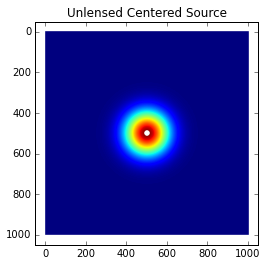

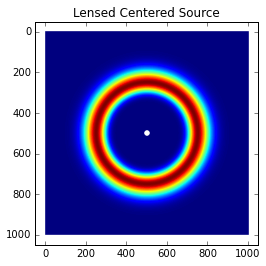

In [95]:
#Figures for Centered Source
figure()
imshow(sourceCenter)
title('Unlensed Centered Source')
scatter(500, 500, color = 'white')
show()
figure()
imshow(lensCenter)
scatter(500, 500, color='white')
title('Lensed Centered Source')
show()


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


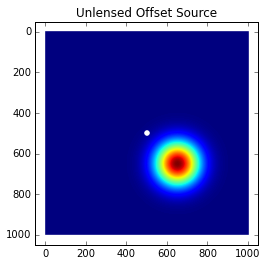

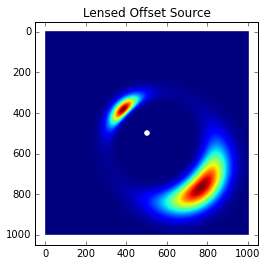

In [96]:
#Figures for Offset Source
figure()
imshow(sourceOffset)
title('Unlensed Offset Source')
scatter(500, 500, color = 'white')
show()

figure()
imshow(lensOffset)
title('Lensed Offset Source')
scatter(500, 500, color ='white')
show()
